# EBCM Fig1/2/3 复现（分步运行）

这个 notebook 将 `scripts/reproduce_fig123.py` 里的逻辑拆成独立步骤，方便你分别跑出 Fig1、Fig2、Fig3。

## 0) 加载脚本模块与基础参数

In [5]:
from __future__ import annotations

from pathlib import Path
import importlib.util
import sys
from IPython.display import Image, display

# ???????? notebook ?? <repo>/notebooks/?
ROOT = Path.cwd().resolve().parent if Path.cwd().name == 'notebooks' else Path.cwd().resolve()
SCRIPT_PATH = ROOT / 'scripts' / 'reproduce_fig123.py'
OUTPUT_DIR = ROOT / 'outputs' / 'figures'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

module_name = 'repro_fig123'
spec = importlib.util.spec_from_file_location(module_name, SCRIPT_PATH)
repro = importlib.util.module_from_spec(spec)
assert spec.loader is not None
sys.modules[module_name] = repro
spec.loader.exec_module(repro)

# ???: 'bold' / 'classic' / 'mono'
STYLE = 'bold'
theme = repro._get_theme(STYLE)

print('ROOT:', ROOT)
print('SCRIPT:', SCRIPT_PATH)
print('OUTPUT_DIR:', OUTPUT_DIR)
print('STYLE:', STYLE)


ROOT: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学
SCRIPT: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学\scripts\reproduce_fig123.py
OUTPUT_DIR: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学\outputs\figures
STYLE: bold


## 1) 生成 Fig1（单独执行）

Saved: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学\outputs\figures\fig1_mass_action_flow.png


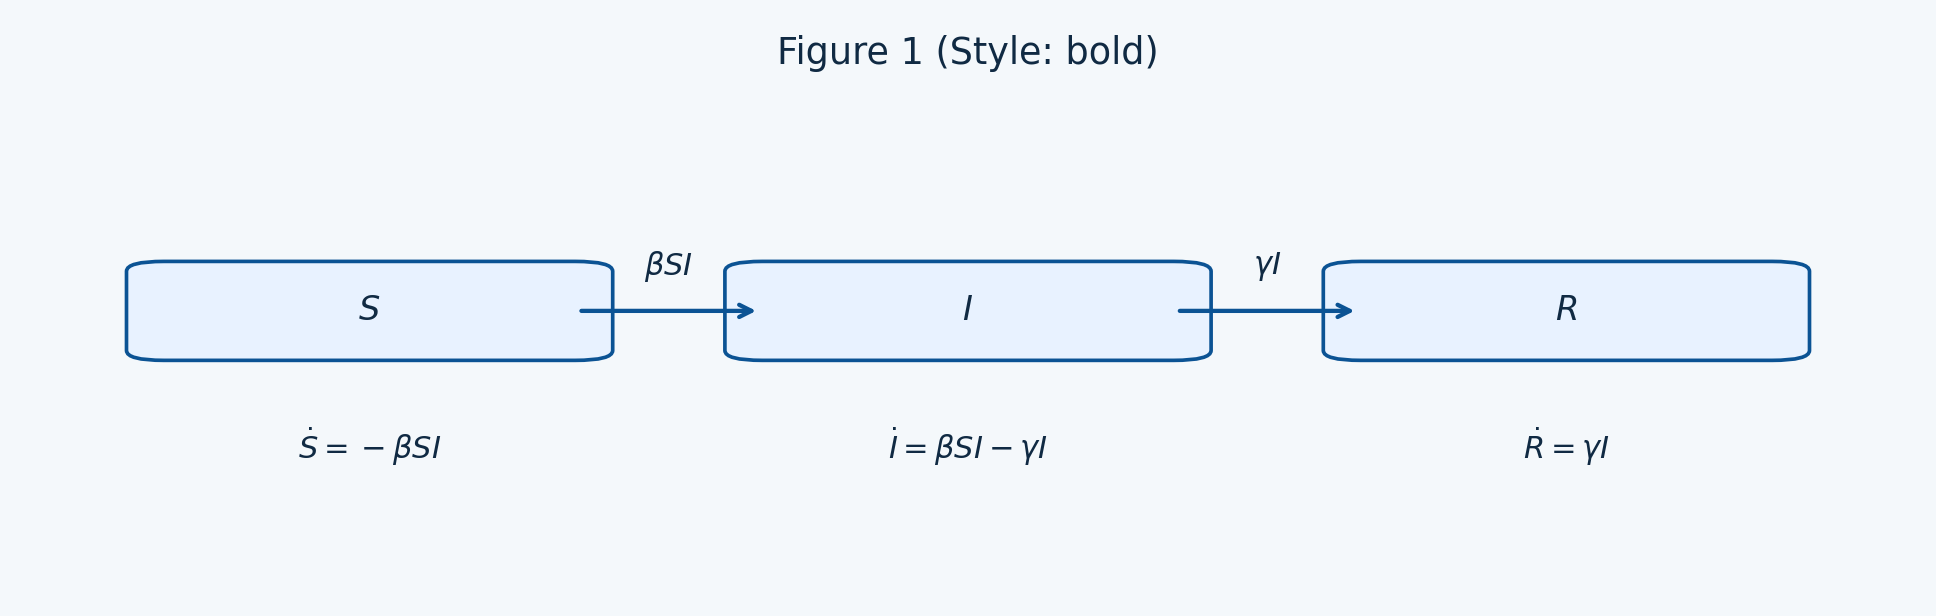

In [6]:
repro.make_fig1(OUTPUT_DIR, theme=theme)
print("Saved:", OUTPUT_DIR / "fig1_mass_action_flow.png")
display(Image(filename=str(OUTPUT_DIR / "fig1_mass_action_flow.png")))

## 2) 生成 Fig2（单独执行）

Saved: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学\outputs\figures\fig2_cm_flow.png


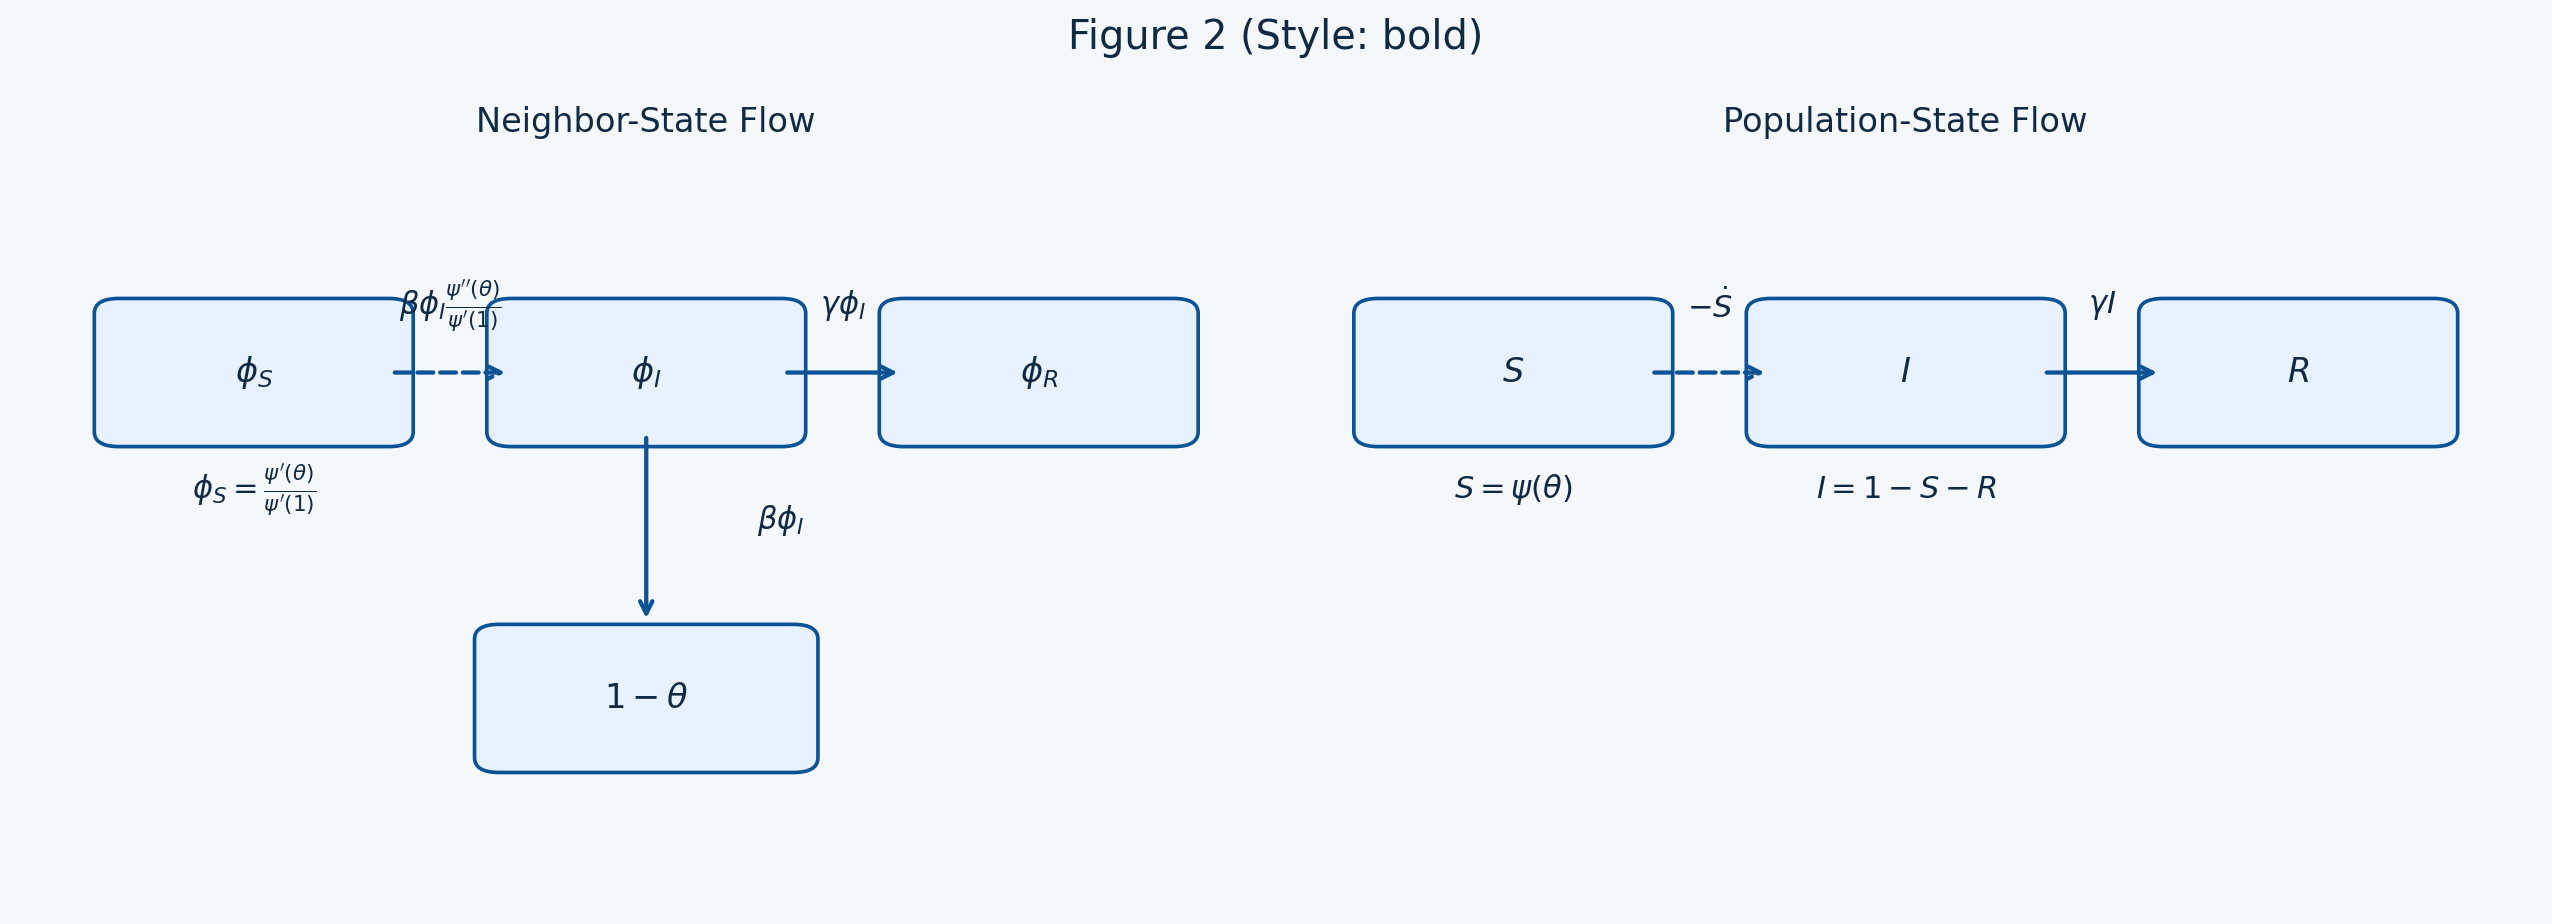

In [7]:
repro.make_fig2(OUTPUT_DIR, theme=theme)
print("Saved:", OUTPUT_DIR / "fig2_cm_flow.png")
display(Image(filename=str(OUTPUT_DIR / "fig2_cm_flow.png")))

## 3) 生成 Fig3（单独执行）

先跑小规模检查，再改到接近论文规模。

Saved: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学\outputs\figures\fig3_cm_example.png


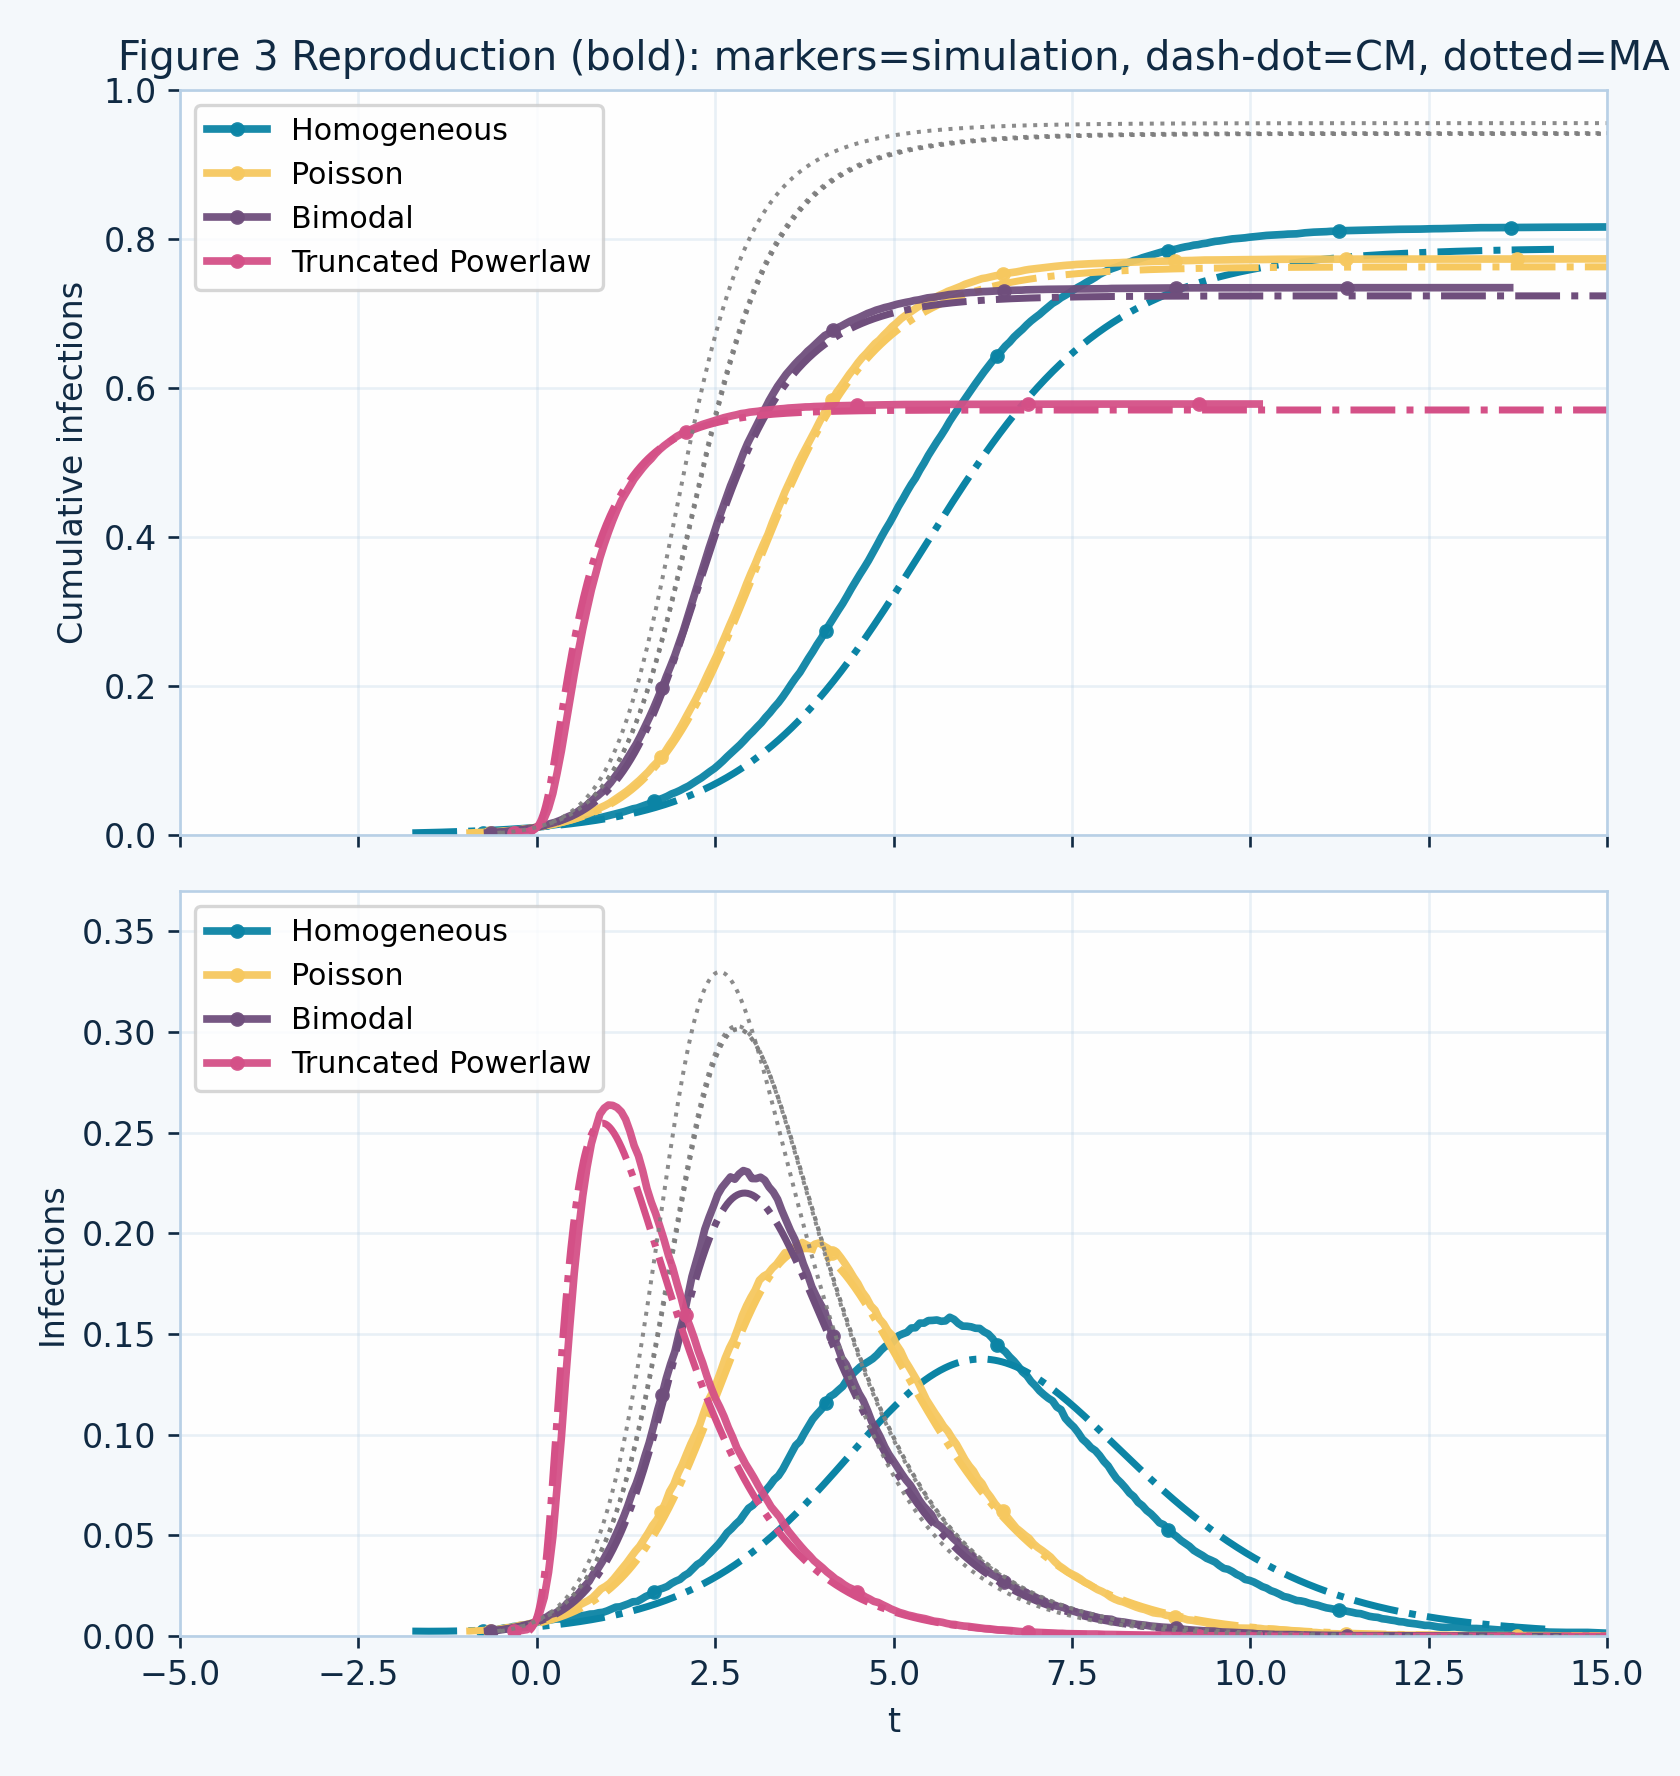

In [8]:
# 小规模快速测试参数
N_NODES = 20000
BETA = 0.6
GAMMA = 1.0
T_MAX = 16.0
DT = 0.06
ODE_STEPS = 901
SEED = 7

repro.make_fig3(
    output_dir=OUTPUT_DIR,
    n_nodes=N_NODES,
    beta=BETA,
    gamma=GAMMA,
    t_max=T_MAX,
    dt=DT,
    ode_steps=ODE_STEPS,
    seed=SEED,
    theme=theme,
)
print("Saved:", OUTPUT_DIR / "fig3_cm_example.png")
display(Image(filename=str(OUTPUT_DIR / "fig3_cm_example.png")))

## 4) 接近论文规模参数（可选）

In [9]:
# 需要更长运行时间
N_NODES = 500000
BETA = 0.6
GAMMA = 1.0
T_MAX = 20.0
DT = 0.05
ODE_STEPS = 1101
SEED = 23

repro.make_fig3(
    output_dir=OUTPUT_DIR,
    n_nodes=N_NODES,
    beta=BETA,
    gamma=GAMMA,
    t_max=T_MAX,
    dt=DT,
    ode_steps=ODE_STEPS,
    seed=SEED,
    theme=theme,
)
print("Saved:", OUTPUT_DIR / "fig3_cm_example.png")

Saved: C:\Users\97747\GW QNM EMRI PROJECT\cmr网络科学\outputs\figures\fig3_cm_example.png


## 5) 输出文件检查

In [ ]:
for p in sorted(OUTPUT_DIR.glob("fig*_*.png")):
    print(p.name, p.stat().st_size, "bytes")